In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0.5, 1.0, 'radio')

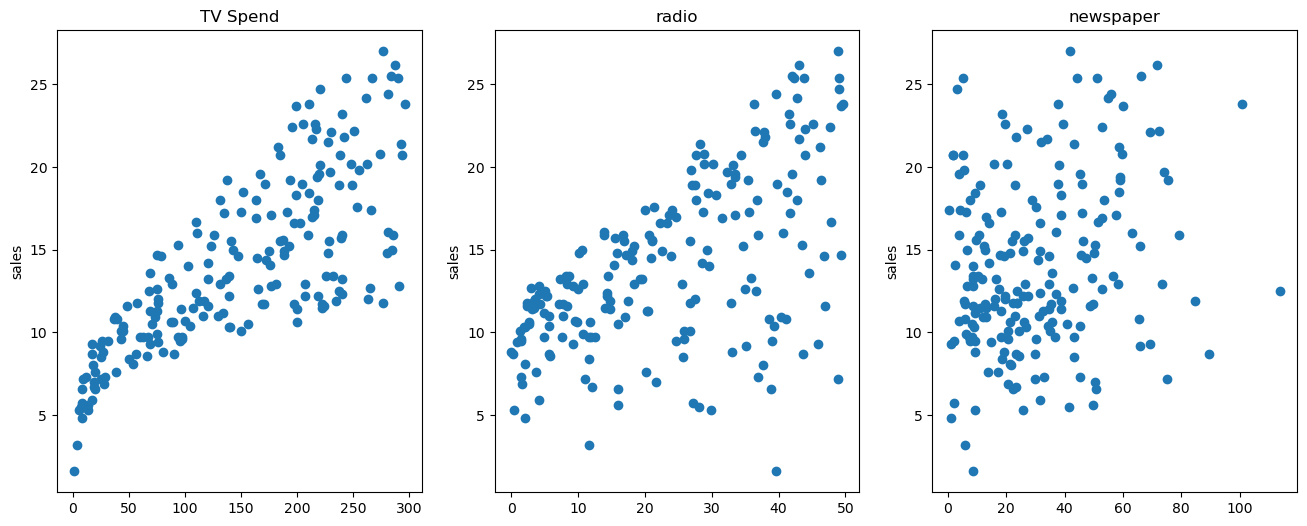

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df["sales"],"o")
axes[0].set_ylabel("sales")
axes[0].set_title("TV Spend")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel('sales')
axes[2].set_title('newspaper')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel('sales')
axes[1].set_title('radio')

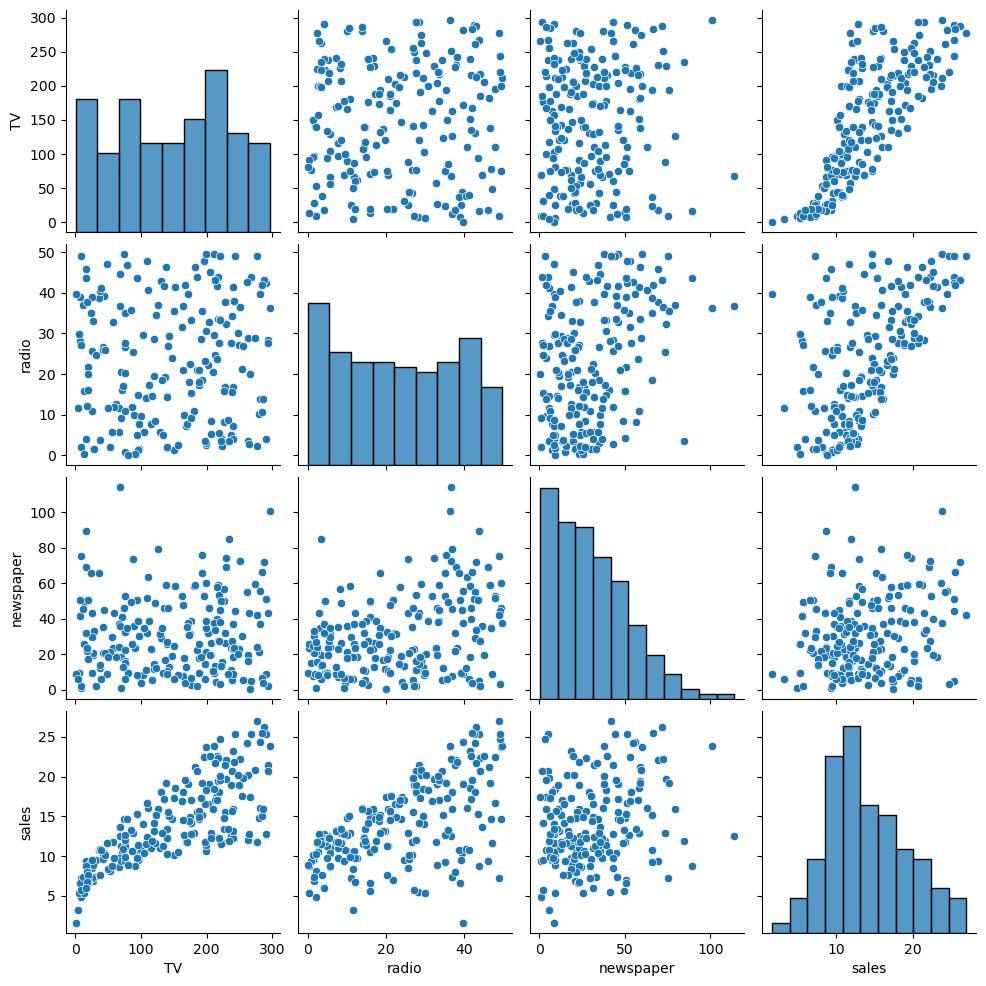

In [6]:
sns.pairplot(data = df)

In [7]:
X = df.drop('sales',axis = 1)

In [8]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y = df['sales']

In [10]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
len(df)

200

In [22]:
len(X_train)

140

In [23]:
len(X_test)

60

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train , y_train)

LinearRegression()

In [34]:
test_predictions = model.predict(X_test)

In [32]:
X_test.head(5)

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [33]:
y_test.head(5)

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [35]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [36]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [37]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

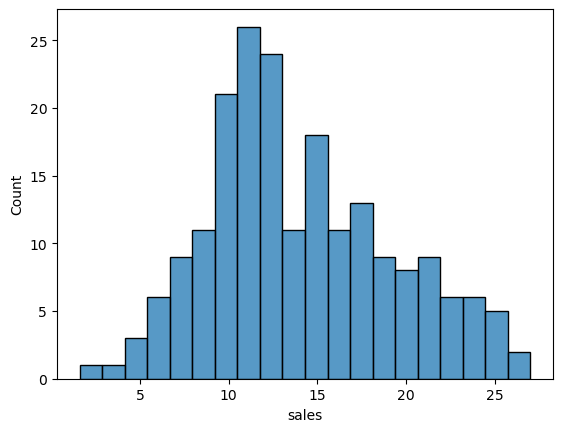

In [40]:
sns.histplot(data = df , x = 'sales', bins = 20)

In [41]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144803

In [42]:
mean_squared_error(y_test,test_predictions)

2.2987166978863787

In [43]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.5161519375993882

In [44]:
test_residuals = y_test - test_predictions

In [45]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

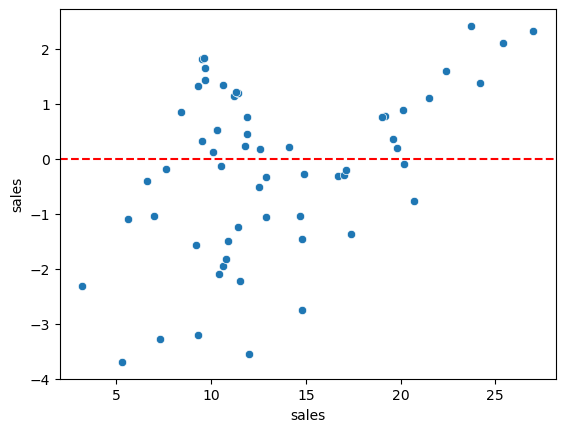

In [48]:
sns.scatterplot(x = y_test , y = test_residuals)
plt.axhline(y = 0 , color = 'red' , ls='--')

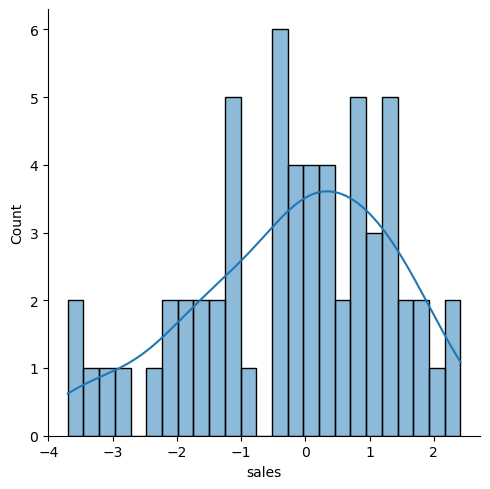

In [49]:
sns.displot(test_residuals, bins = 25 , kde = True)

In [50]:
import scipy as sp

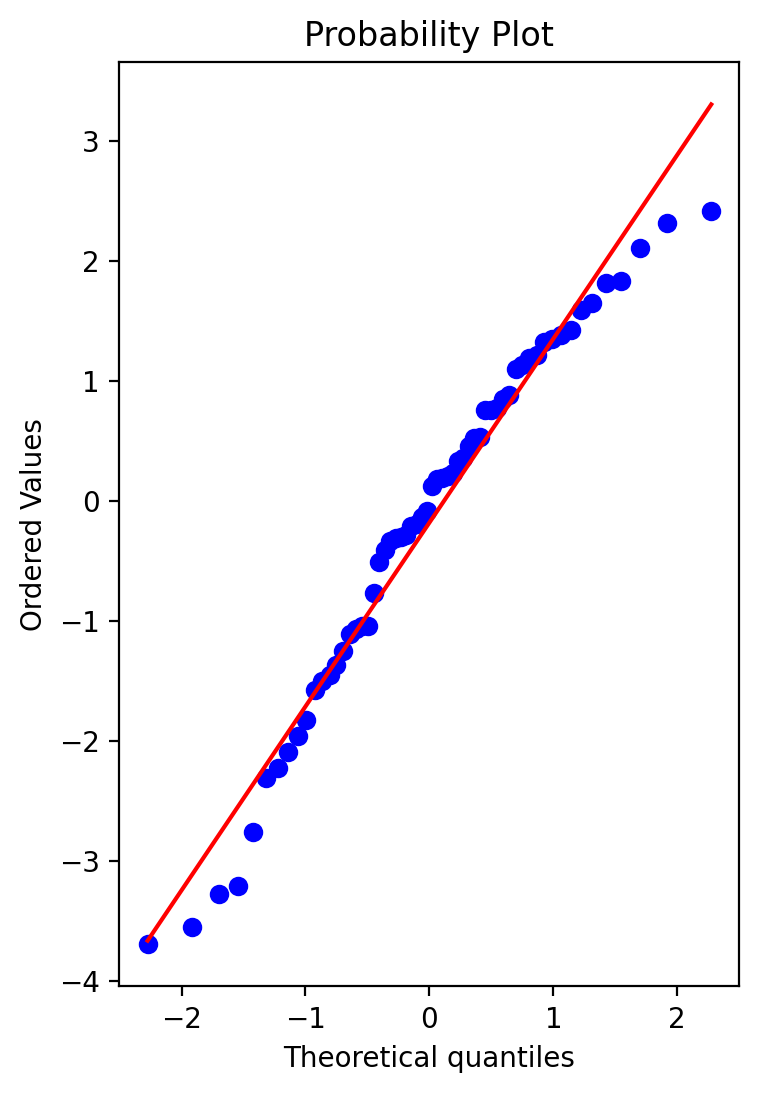

In [55]:
fig ,ax = plt.subplots(figsize=(4,6),dpi =200)
_= sp.stats.probplot(test_residuals,plot = ax)

In [56]:
final_model = LinearRegression()

In [57]:
final_model.fit(X,y)

LinearRegression()

In [58]:
final_model.coef_ # Beta coefficients 

array([ 0.04576465,  0.18853002, -0.00103749])

In [59]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [60]:
y_hat = final_model.predict(X)

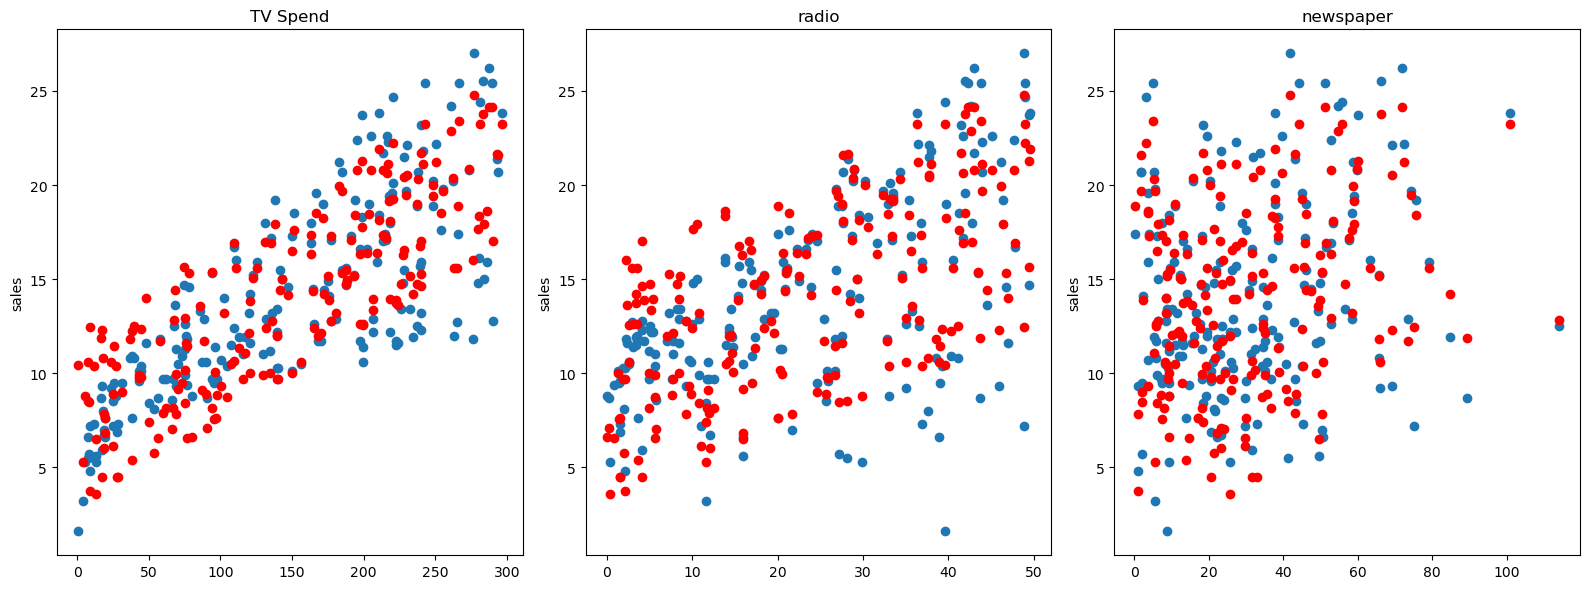

In [62]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df["sales"],"o")
axes[0].plot(df['TV'],y_hat,"o",color = 'red')
axes[0].set_ylabel("sales")
axes[0].set_title("TV Spend")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,"o",color = 'red')
axes[2].set_ylabel('sales')
axes[2].set_title('newspaper')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,"o",color = 'red')
axes[1].set_ylabel('sales')
axes[1].set_title('radio')

plt.tight_layout();

In [63]:
from joblib import dump,load

In [64]:
dump(final_model,"final_sales_model.joblib")

['final_sales_model.joblib']

In [65]:
loaded_model = load('final_sales_model.joblib')

In [67]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [68]:
X.shape

(200, 3)

### Review saved and loaded Linear Regression model with an another dataset

In [76]:
#192 TV , 48 Radio , 99 Newspaper
#Sales ?
campaign =[[192,48,99]]

In [77]:
loaded_model.predict(campaign)

/Users/ataikenesbekov/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.6724303])